In [124]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Saving the data as pandas dataframe

In [125]:
data = pd.read_csv("50_Startups.csv")

In [126]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [127]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [128]:
df = data

In [129]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


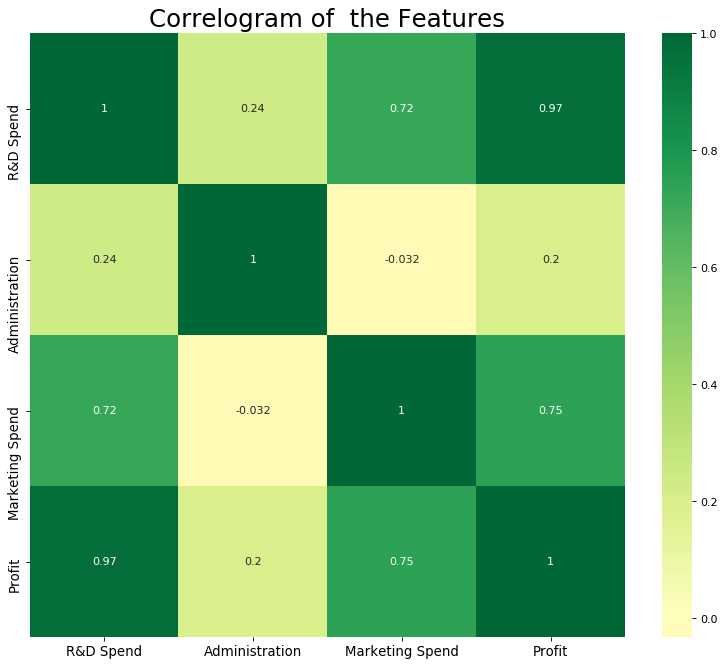

In [130]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of  the Features', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [131]:
X = df.iloc[:,:-1].values
y = df.iloc[:,4]

In [132]:
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])
onehot_encoder = OneHotEncoder(categorical_features=[3])
X = onehot_encoder.fit_transform(X).toarray()


# Spliting the data set to train and test

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .25,random_state=0)

# Model Selection

In [135]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# model prediction

In [136]:
y_pred = regression_model.predict(X_test)

# model accuracy

In [137]:
r2_score(y_test,y_pred)


0.9315815199152194

# Cross Validation

In [138]:
from sklearn.model_selection import cross_val_score
# reg = LinearRegression()
cv_results = cross_val_score(regression_model,X,y,cv=4)

In [139]:
print(cv_results)

[ 0.7343055  -0.15150116 -0.95783317  0.47030549]


In [146]:
df1 = pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})
df1


,predictions,actual
28,104440.725826,103282.38
11,132253.815677,144259.40
10,132872.071743,146121.95
41,71707.787714,77798.83
2,178678.993499,191050.39
27,115078.131243,105008.31
38,66093.929727,81229.06
31,98759.727641,97483.56
22,114113.599409,110352.25
4,167979.494115,166187.94


# Applying the model to a single observation

In [141]:
test_data = [0,1,0,145789,165331,186489]
test_data_array  = np.array(test_data)
test_data_reshape = test_data_array.reshape(1,-1)
pred_test_data_single_row  = regression_model.predict(test_data_reshape)
round(float(pred_test_data_single_row),2)


168214.27

In [142]:
from sklearn.externals import joblib
joblib.dump(regression_model,"multipleLinearRegression.pkl")

['multipleLinearRegression.pkl']